In [1]:
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


400


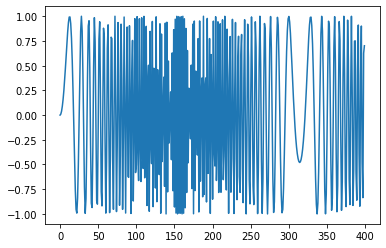

In [62]:
# make synthetic data
series = np.sin((0.1 * np.arange(400))**2)

# optional add noise
# series = series + np.random.randn(200)*0.1
print(len(series))

# plot
plt.plot(series)
plt.show();

In [63]:
# build the dataset
T = 10 
D = 1
X = []
Y = []

for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)
    
X = np.array(X).reshape(-1, T) # Now the data should be N x T x D
Y = np.array(Y)
N = len(X)
print("X.shape: ", X.shape, " Y.shape: ", Y.shape)

X.shape:  (390, 10)  Y.shape:  (390,)


### Autoregressive Linear Model

In [6]:
# LINEAR
_input = Input(shape=(T, ))
x = Dense(1)(_input)

# init
model = Model(_input, x)

# compile
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.01),
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/80
195/195 [==============================] - 0s 1ms/sample - loss: 2.0892 - val_loss: 0.8292
Epoch 2/80
195/195 [==============================] - 0s 75us/sample - loss: 1.7506 - val_loss: 0.7436
Epoch 3/80
195/195 [==============================] - 0s 76us/sample - loss: 1.5126 - val_loss: 0.6816
Epoch 4/80
195/195 [==============================] - 0s 74us/sample - loss: 1.2824 - val_loss: 0.6303
Epoch 5/80
195/195 [==============================] - 0s 90us/sample - loss: 1.1232 - val_loss: 0.5917
Epoch 6/80
195/195 [==============================] - 0s 120us/sample - loss: 0.9971 - val_loss: 0.5631
Epoch 7/80
195/195 [==============================] - 0s 104us/sample - loss: 0.8856 - val_loss: 0.5393
Epoch 8/80
195/195 [==============================] - 0s 95us/sample - loss: 0.7937 - val_loss: 0.5226
Epoch 9/80
195/195 [==============================] - 0s 97us/sample - loss: 0.7196 - val_loss: 0.5121
Epoch 10/80
195/195 [=====

195/195 [==============================] - 0s 75us/sample - loss: 0.4898 - val_loss: 0.5680
Epoch 80/80
195/195 [==============================] - 0s 74us/sample - loss: 0.4913 - val_loss: 0.5729


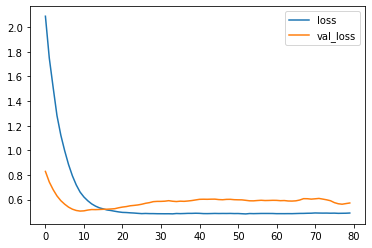

In [7]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

#### One-Step Forecast

(390, 1)


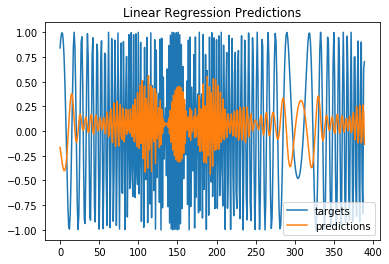

In [8]:
# ONE-STEP Forecast using true targets
outputs = model.predict(X)
print(outputs.shape)

predictions = outputs[:, 0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show();

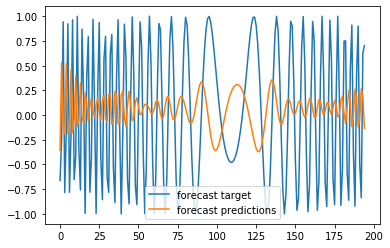

In [10]:
# WRONG forecasting using true targets
validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
    p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
    i += 1
    validation_predictions.append(p)
    
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

#### Multi-Step Forecast

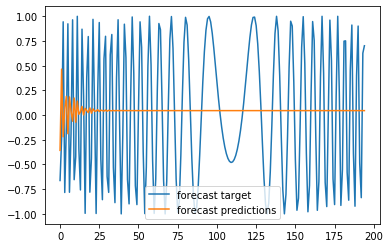

In [11]:
# CORRECT way of forecasting
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
    p = model.predict(last_x.reshape(1, -1))[0, 0] 
    # update
    validation_predictions.append(p)
    # make the new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p
# plot 
plt.plot(validation_target, label="forecast target")
plt.plot(validation_predictions, label="forecast predictions")
plt.legend();

### SimpleRNN Model

In [34]:
# Reshape the Data to N x T x D
X = X.reshape(-1, T, 1)

In [35]:
# make RNN
_input = Input(shape=(T, D))
x = SimpleRNN(10)(_input)
x = Dense(1)(x)
model = Model(_input, x)

# compile 
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.01)
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 1s 3ms/sample - loss: 1.2817 - val_loss: 0.4648
Epoch 2/200
195/195 [==============================] - 0s 168us/sample - loss: 0.7163 - val_loss: 0.4840
Epoch 3/200
195/195 [==============================] - 0s 146us/sample - loss: 0.5346 - val_loss: 0.5247
Epoch 4/200
195/195 [==============================] - 0s 159us/sample - loss: 0.4648 - val_loss: 0.5581
Epoch 5/200
195/195 [==============================] - 0s 161us/sample - loss: 0.4490 - val_loss: 0.5363
Epoch 6/200
195/195 [==============================] - 0s 155us/sample - loss: 0.4443 - val_loss: 0.5507
Epoch 7/200
195/195 [==============================] - 0s 146us/sample - loss: 0.4318 - val_loss: 0.5423
Epoch 8/200
195/195 [==============================] - 0s 150us/sample - loss: 0.4403 - val_loss: 0.5428
Epoch 9/200
195/195 [==============================] - 0s 169us/sample - loss: 0.3977 - val_loss: 0.5106
Epoch 10/20

Epoch 78/200
195/195 [==============================] - 0s 153us/sample - loss: 0.0318 - val_loss: 0.0918
Epoch 79/200
195/195 [==============================] - 0s 155us/sample - loss: 0.0314 - val_loss: 0.0843
Epoch 80/200
195/195 [==============================] - 0s 157us/sample - loss: 0.0303 - val_loss: 0.0816
Epoch 81/200
195/195 [==============================] - 0s 154us/sample - loss: 0.0296 - val_loss: 0.0834
Epoch 82/200
195/195 [==============================] - 0s 152us/sample - loss: 0.0287 - val_loss: 0.0920
Epoch 83/200
195/195 [==============================] - 0s 159us/sample - loss: 0.0326 - val_loss: 0.0915
Epoch 84/200
195/195 [==============================] - 0s 156us/sample - loss: 0.0320 - val_loss: 0.0925
Epoch 85/200
195/195 [==============================] - 0s 151us/sample - loss: 0.0287 - val_loss: 0.0885
Epoch 86/200
195/195 [==============================] - 0s 148us/sample - loss: 0.0336 - val_loss: 0.0928
Epoch 87/200
195/195 [========================

Epoch 155/200
195/195 [==============================] - 0s 144us/sample - loss: 0.0181 - val_loss: 0.0940
Epoch 156/200
195/195 [==============================] - 0s 138us/sample - loss: 0.0224 - val_loss: 0.0899
Epoch 157/200
195/195 [==============================] - 0s 146us/sample - loss: 0.0180 - val_loss: 0.0785
Epoch 158/200
195/195 [==============================] - 0s 146us/sample - loss: 0.0150 - val_loss: 0.0852
Epoch 159/200
195/195 [==============================] - 0s 145us/sample - loss: 0.0162 - val_loss: 0.0829
Epoch 160/200
195/195 [==============================] - 0s 140us/sample - loss: 0.0158 - val_loss: 0.0879
Epoch 161/200
195/195 [==============================] - 0s 144us/sample - loss: 0.0162 - val_loss: 0.0761
Epoch 162/200
195/195 [==============================] - 0s 142us/sample - loss: 0.0167 - val_loss: 0.0858
Epoch 163/200
195/195 [==============================] - 0s 140us/sample - loss: 0.0184 - val_loss: 0.0807
Epoch 164/200
195/195 [==============

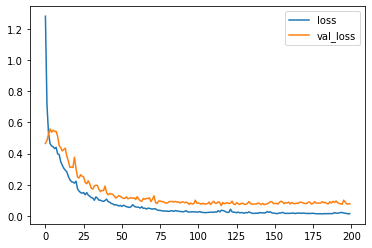

In [36]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

#### One-Step Forecast

(390, 1)


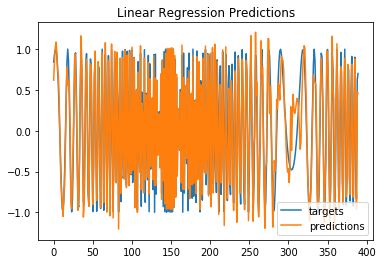

In [37]:
# ONE-STEP Forecast using true targets
outputs = model.predict(X)
print(outputs.shape)

predictions = outputs[:, 0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show();

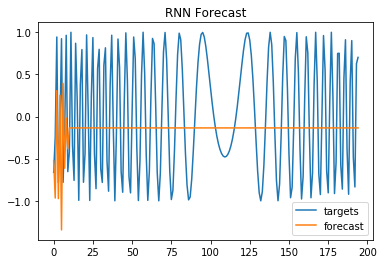

In [38]:
# CORRECT way of forecasting
forecast = []
input_ = X[-N//2]

while len(forecast) < len(Y[-N//2:]):
    # reshape the input_ to N x T x D
    f = model.predict(input_.reshape(1, T, 1))[0, 0]
    forecast.append(f)
    
    # make the new input
    input_ = np.roll(input_, -1)
    input_[-1] = p
    
# plot 
plt.plot(Y[-N//2:], label="targets")
plt.plot(forecast, label="forecast")
plt.title("RNN Forecast")
plt.legend();

### LSTM Model

In [45]:
# Reshape the Data to N x T x D
X = X.reshape(-1, T, 1)

In [58]:
# make RNN
_input = Input(shape=(T, D))
x = LSTM(10)(_input)
x = Dense(1)(x)
model = Model(_input, x)

# compile 
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.05)
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2: ], Y[-N//2: ]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 1s 7ms/sample - loss: 0.5568 - val_loss: 0.5292
Epoch 2/200
195/195 [==============================] - 0s 285us/sample - loss: 0.5314 - val_loss: 0.4918
Epoch 3/200
195/195 [==============================] - 0s 246us/sample - loss: 0.4885 - val_loss: 0.4777
Epoch 4/200
195/195 [==============================] - 0s 253us/sample - loss: 0.4296 - val_loss: 0.4939
Epoch 5/200
195/195 [==============================] - 0s 254us/sample - loss: 0.3278 - val_loss: 0.4268
Epoch 6/200
195/195 [==============================] - 0s 254us/sample - loss: 0.2330 - val_loss: 0.2982
Epoch 7/200
195/195 [==============================] - 0s 241us/sample - loss: 0.1614 - val_loss: 0.2984
Epoch 8/200
195/195 [==============================] - 0s 238us/sample - loss: 0.1436 - val_loss: 0.2279
Epoch 9/200
195/195 [==============================] - 0s 251us/sample - loss: 0.0956 - val_loss: 0.2116
Epoch 10/20

Epoch 78/200
195/195 [==============================] - 0s 225us/sample - loss: 0.0021 - val_loss: 0.0299
Epoch 79/200
195/195 [==============================] - 0s 224us/sample - loss: 0.0022 - val_loss: 0.0248
Epoch 80/200
195/195 [==============================] - 0s 219us/sample - loss: 0.0030 - val_loss: 0.0281
Epoch 81/200
195/195 [==============================] - 0s 232us/sample - loss: 0.0030 - val_loss: 0.0304
Epoch 82/200
195/195 [==============================] - 0s 249us/sample - loss: 0.0033 - val_loss: 0.0198
Epoch 83/200
195/195 [==============================] - 0s 273us/sample - loss: 0.0037 - val_loss: 0.0463
Epoch 84/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0047 - val_loss: 0.0270
Epoch 85/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0068 - val_loss: 0.0398
Epoch 86/200
195/195 [==============================] - 0s 246us/sample - loss: 0.0052 - val_loss: 0.0322
Epoch 87/200
195/195 [========================

195/195 [==============================] - 0s 235us/sample - loss: 9.3338e-04 - val_loss: 0.0386
Epoch 155/200
195/195 [==============================] - 0s 229us/sample - loss: 7.0610e-04 - val_loss: 0.0337
Epoch 156/200
195/195 [==============================] - 0s 224us/sample - loss: 0.0011 - val_loss: 0.0392
Epoch 157/200
195/195 [==============================] - 0s 229us/sample - loss: 0.0010 - val_loss: 0.0383
Epoch 158/200
195/195 [==============================] - 0s 226us/sample - loss: 0.0015 - val_loss: 0.0380
Epoch 159/200
195/195 [==============================] - 0s 224us/sample - loss: 0.0019 - val_loss: 0.0430
Epoch 160/200
195/195 [==============================] - 0s 224us/sample - loss: 0.0022 - val_loss: 0.0340
Epoch 161/200
195/195 [==============================] - 0s 228us/sample - loss: 0.0024 - val_loss: 0.0367
Epoch 162/200
195/195 [==============================] - 0s 240us/sample - loss: 0.0030 - val_loss: 0.0525
Epoch 163/200
195/195 [====================

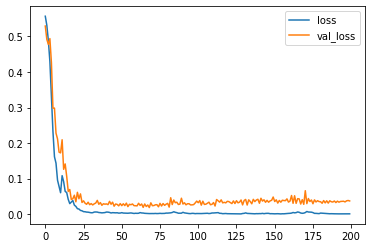

In [59]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

#### One-Step Forecast

(390, 1)


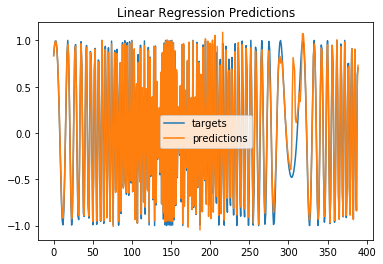

In [60]:
# ONE-STEP Forecast using true targets
outputs = model.predict(X)
print(outputs.shape)

predictions = outputs[:, 0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show();

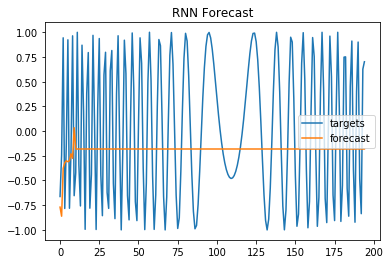

In [61]:
# MULTISTEP forecasting
forecasts = []
input_ = X[-N//2]

while len(forecasts) < len(Y[-N//2:]):
    # reshape the input_ to N x T x D
    f = model.predict(input_.reshape(1, T, 1))[0, 0]
    forecasts.append(f)
    
    # make the new input
    input_ = np.roll(input_, -1)
    input_[-1] = p

# plot 
plt.plot(Y[-N//2:], label="targets")
plt.plot(forecasts, label="forecast")
plt.title("RNN Forecast")
plt.legend();

### GRU Model

In [64]:
# Reshape the Data to N x T x D
X = X.reshape(-1, T, 1)

In [65]:
# make RNN
_input = Input(shape=(T, D))
x = GRU(10)(_input)
x = Dense(1)(x)
model = Model(_input, x)

# compile 
model.compile(
    loss="mse",
    optimizer=Adam(lr=0.05)
)

# train
r = model.fit(
    X[:-N//2], Y[:-N//2],
    batch_size=32,
    epochs=200,
    validation_data=(X[-N//2: ], Y[-N//2: ]),
)

Train on 195 samples, validate on 195 samples
Epoch 1/200
195/195 [==============================] - 1s 6ms/sample - loss: 0.5250 - val_loss: 0.6504
Epoch 2/200
195/195 [==============================] - 0s 265us/sample - loss: 0.5236 - val_loss: 0.6865
Epoch 3/200
195/195 [==============================] - 0s 243us/sample - loss: 0.5179 - val_loss: 0.5990
Epoch 4/200
195/195 [==============================] - 0s 242us/sample - loss: 0.5142 - val_loss: 0.5454
Epoch 5/200
195/195 [==============================] - 0s 247us/sample - loss: 0.5268 - val_loss: 0.5396
Epoch 6/200
195/195 [==============================] - 0s 251us/sample - loss: 0.4883 - val_loss: 0.5714
Epoch 7/200
195/195 [==============================] - 0s 246us/sample - loss: 0.4779 - val_loss: 0.5578
Epoch 8/200
195/195 [==============================] - 0s 246us/sample - loss: 0.4481 - val_loss: 0.4622
Epoch 9/200
195/195 [==============================] - 0s 242us/sample - loss: 0.3518 - val_loss: 0.6434
Epoch 10/20

Epoch 78/200
195/195 [==============================] - 0s 226us/sample - loss: 0.0033 - val_loss: 0.0333
Epoch 79/200
195/195 [==============================] - 0s 236us/sample - loss: 0.0028 - val_loss: 0.0304
Epoch 80/200
195/195 [==============================] - 0s 224us/sample - loss: 0.0022 - val_loss: 0.0309
Epoch 81/200
195/195 [==============================] - 0s 225us/sample - loss: 0.0025 - val_loss: 0.0287
Epoch 82/200
195/195 [==============================] - 0s 220us/sample - loss: 0.0029 - val_loss: 0.0252
Epoch 83/200
195/195 [==============================] - 0s 223us/sample - loss: 0.0038 - val_loss: 0.0283
Epoch 84/200
195/195 [==============================] - 0s 228us/sample - loss: 0.0024 - val_loss: 0.0323
Epoch 85/200
195/195 [==============================] - 0s 222us/sample - loss: 0.0032 - val_loss: 0.0321
Epoch 86/200
195/195 [==============================] - 0s 229us/sample - loss: 0.0045 - val_loss: 0.0307
Epoch 87/200
195/195 [========================

Epoch 155/200
195/195 [==============================] - 0s 232us/sample - loss: 0.0135 - val_loss: 0.0331
Epoch 156/200
195/195 [==============================] - 0s 231us/sample - loss: 0.0060 - val_loss: 0.0423
Epoch 157/200
195/195 [==============================] - 0s 247us/sample - loss: 0.0076 - val_loss: 0.0251
Epoch 158/200
195/195 [==============================] - 0s 248us/sample - loss: 0.0058 - val_loss: 0.0419
Epoch 159/200
195/195 [==============================] - 0s 241us/sample - loss: 0.0041 - val_loss: 0.0297
Epoch 160/200
195/195 [==============================] - 0s 225us/sample - loss: 0.0041 - val_loss: 0.0255
Epoch 161/200
195/195 [==============================] - 0s 238us/sample - loss: 0.0041 - val_loss: 0.0223
Epoch 162/200
195/195 [==============================] - 0s 245us/sample - loss: 0.0033 - val_loss: 0.0357
Epoch 163/200
195/195 [==============================] - 0s 248us/sample - loss: 0.0049 - val_loss: 0.0347
Epoch 164/200
195/195 [==============

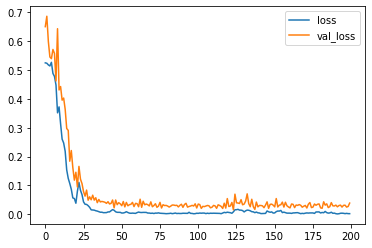

In [66]:
# plot loss per iteration
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend();

#### One-Step Forecast

(390, 1)


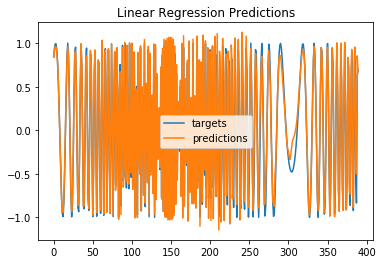

In [67]:
# ONE-STEP Forecast using true targets
outputs = model.predict(X)
print(outputs.shape)

predictions = outputs[:, 0]

plt.plot(Y, label="targets")
plt.plot(predictions, label="predictions")
plt.title("Linear Regression Predictions")
plt.legend()
plt.show();

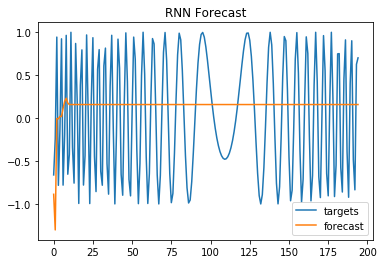

In [68]:
# MULTISTEP forecasting
forecasts = []
input_ = X[-N//2]

while len(forecasts) < len(Y[-N//2:]):
    # reshape the input_ to N x T x D
    f = model.predict(input_.reshape(1, T, 1))[0, 0]
    forecasts.append(f)
    
    # make the new input
    input_ = np.roll(input_, -1)
    input_[-1] = p

# plot 
plt.plot(Y[-N//2:], label="targets")
plt.plot(forecasts, label="forecast")
plt.title("RNN Forecast")
plt.legend();